**Exercise: complete all the missing lines (denoted #___ ) in the code.**

# Leaky integrate-and-fire neurons

The LIF model describes a neuron's voltage dynamics through the ODE 

$$ \tau_m \frac{dV(t)}{dt} = E_l-V(t) + \frac{I}{g_l}, \text{ if } V > V_{th} \text{ then } V=V_{reset}, $$

with $V$ the membrane potential, $\tau_m$ the membrane time constant, $E_l$ the leak potential, $g_l$ the leak conductance and $I$ a constant applied current.

We begin by importing the necessary libraries:

In [2]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

plt.logging.getLogger('matplotlib.font_manager').disabled = True

c = colors = plt.cm.plasma(np.linspace(0,1,6))

plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=14)     # fontsize of the axes labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=16)   # fontsize of the figure title
plt.rc('lines', linewidth=2)     # linewidths of all plots set to 2

%matplotlib inline

And setting the constants:

In [3]:
# General constants
Cm, gl, El = 100, 10, -70
taum = Cm/gl
Vr, Vth = -80, -50

## Modeling a LIF neuron

The code below models and plots the evolution of a LIF neuron's membrane potential injected with various constant input current over $100$ms. Try changing the input current value $I$ to see how it affects the neuron's behaviour. Try also changing the time step $dt$ to see how it influences the numerical result. 

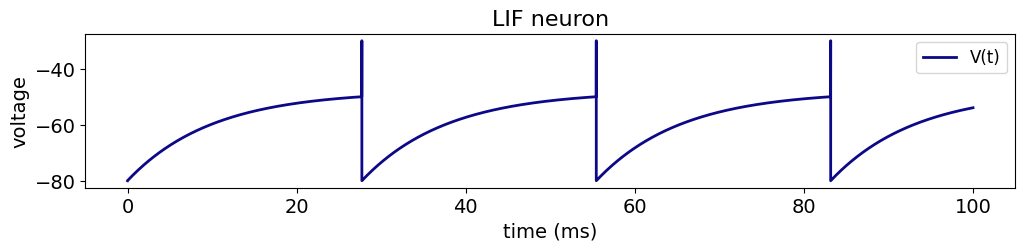

In [4]:
# LIF ODE
def df(x, I):
    return #___

# Euler scheme
def euler(x, I):
    return #___

# Time step
dt = #___

# Initial conditions
V0 = Vr
V, time = [V0], [0]

# Ith computed in the tutorial
Ith = gl*(Vth-El)

# Input current
I = Ith + 20

# Maximum simulation time
max_time = 100

for i in range(int(max_time/dt)-1):
    V_next = #___

    # If V above threshold, reset
    if V_next > Vth: 
        V_next = #___ 
        
        # Creating the spike
        V.append(Vth+20) 
        time.append(i*dt)  
        
    V.append(V_next)
    time.append(i*dt)

# Plot the neuron's voltage from t0=0 to T=100
plt.figure(figsize=(12,2))
plt.title('LIF neuron')
plt.xlabel('time (ms)')
plt.ylabel('voltage')
plt.plot(time, V, label='V(t)', c=c[0])
plt.legend()
plt.show()

## $fI$ curve

The code below plots the f-I curve determined during the tutorial. We will plot it against the f-I curve obtained through simulations to compare.
The theoretical f-I curve is given by $f(I_{app}) = 1/T_{ISI}$ with
$$T_{ISI} = -\tau_m \log\left( \frac{V_m^{ss}-V_{th}}{V_m^{ss}-V_{reset}} \right) = -\tau_m \log \left( \frac{E_l + I_{app}/g_l - V_{th}}{E_l + I_{app}/g_l - V_{reset}} \right). $$

In [ ]:
''' Theoretical fI curve '''
I = np.linspace(Ith-10,Ith+40,1000)
Vss = El + I/gl
Tisi = #___
f = #___

# Remove impossible values
f[np.isnan(f)]=0

# Plot theoretical f-I curve
plt.figure(figsize=(8,4))
plt.plot(I, f, c=c[0], label='analytical')

''' Numerical fI curve '''
# Maximum simulation time
max_time = 1000

# Range of inputs
Iapp = np.linspace(Ith-10,Ith+40,20)

# Empty list to store spikes
spikes = []

dt = 0.01
# For loop
for I in Iapp:
    
    # Initial conditions
    V0 = Vr
    V, time = [V0], [0]
    spike_count = 0

    # Usual simulation loop
    for i in range(int(max_time/dt)+1):
        V_next = #___
    
        # If V above threshold, reset
        if V_next > Vth: 
            V_next = #___ 
            spike_count += #___
            
        V.append(V_next)
    spikes.append(spike_count)

# Converting list to array
spikes = np.array(spikes)
FR = spikes/max_time

# Plot numerical f-I curve
plt.scatter(Iapp, FR, c=c[2], label="simulated")

# Plotting parameters
plt.title('$f-I$ curve analytical vs simulated')
plt.xlabel('input $I$')
plt.ylabel('frequency $f$')
plt.legend()
plt.show()

## Response to oscillating input

The code below models and plots the evolution of a neuron's membrane potential injected with a transient input current.

In [ ]:
# Simulation of LIF neuron receiving oscillatory input
V0 = Vr
V, time = [V0], [0]
max_time = 100

I0, omega = 400, .5
I = 2*I0*np.cos(omega*np.arange(0, max_time, dt))

for i in range(int(max_time/dt)-1):
    V_next = #___
    
    if V_next > Vth: 
        V_next = #___
        V.append(Vth+20) 
        time.append(i*dt)  
        
    V.append(V_next)
    time.append(i*dt)

A, phi = #___, ___

fig, ax = plt.subplots(2, 1, figsize=(12,4), sharex=True)

ax[0].set_title('LIF with oscillatory input')
ax[0].plot(time, I, c=c[1])
ax[0].set_ylabel('input current')

ax[1].plot(time, V, linestyle='--', c=c[0], label='$V(t)$')
ax[1].plot(time, El+2*A*np.cos(omega*np.array(time)+phi), linestyle='--', c=c[2], label='$V^{ss}(t)$') # steady-state solution
ax[1].set_ylabel('voltage')
ax[1].set_xlabel('time (ms)')
ax[1].legend(loc='upper right')
plt.show()

### Low-pass filtering

In [ ]:
V0 = Vr
V, time = [V0], [0]
max_time = 100

I0, omega = 400, 10
I = 2*I0*np.cos(omega*np.arange(0, max_time, dt))

for i in range(int(max_time/dt)-1):
    V_next = #___
    
    if V_next > Vth: 
        V_next = #___
        V.append(Vth+20) 
        time.append(i*dt)  
        
    V.append(V_next)
    time.append(i*dt)

A, phi = #___, ___

plt.figure(figsize=(12,2))
plt.title('Low-pass filter behaviour')
plt.plot(time, V, linestyle='-', c=c[0], label='V(t)')
plt.ylabel('voltage')
plt.xlabel('time (ms)')
plt.legend(loc='lower right')
plt.show()

# Modified LIF neurons

We now consider the more simple ODE describing the neuron's voltage dynamics
$$ \tau_m \frac{dV(t)}{dt} = -V(t) + I. $$

In what follows, we will add more realism to the previously studied LIF model by adding:
- a refractory period,
- firing rate adaptation.

Again, we begin by setting the constants:

In [9]:
# General constants
Cm, gl = 100, 10
taum = Cm/gl
Vr, Vth = 0, 20
dt = 0.01

## Refractory period

The code below models a LIF neuron with a refractory period (ref_period).

In [ ]:
# LIF ODE
def df(x, I):
    return #___

# Euler scheme
def euler(x, I):
    return #___

V0 = Vr
V, time = [V0], [0]
I = 25
max_time = 140

ref_period = 10
ref_period_countdown = 0

for i in range(int(max_time/dt)-1):
    V_next = #___
    
    if V_next > Vth: 
        V_next = #___
        V.append(Vth+20) 
        time.append(i*dt) 
        ref_period_countdown = #___
        
    if ref_period_countdown > 0:
        V.append(Vr)
        time.append(i*dt)
        ref_period_countdown -= 1
        
    else:
        V.append(V_next)
        time.append(i*dt)

plt.figure(figsize=(12,2))
plt.title('LIF neuron with refractory period')
plt.xlabel('time (ms)')
plt.ylabel('voltage')
plt.plot(time, V, label='V(t)', c=c[2])
plt.legend(loc='upper right')
plt.show()

## Firing rate adaptation

We model a LIF with firing rate adaptation through the following ODE
$$ \tau_m \frac{dV(t)}{dt} = -V(t) - W(t) + I, $$
where $W$ models the adaptation. After a spike, $W$ is incremented by $W_R$ and decays back to zero with time constant $\tau_w$ as such
$$ \tau_w \frac{dW(t)}{dt} = -W(t). $$

## Neglecting decay

We start by considering that $W$ is constant between spikes. The following code takes firing rate adaptation into account in the previously studied LIF - we will plot a neuron with versus without adaptation so that we can compare the two.

In [ ]:
# LIF ODE with adaptation
def df(x, w, I):
    return #___

# Euler scheme
def euler(x, w, I):
    return #___

V0 = Vr
V_adapt, time_adapt = [V0], [0]
V, time = [V0], [0]
I = 25
max_time = 140
W0, WR = 0, 1
W = [W0]

for i in range(int(max_time/dt)-1):
    # with adaptation
    Vadapt_next = #___
    
    if Vadapt_next > Vth: 
        Vadapt_next = #___
        W.append(#___)
        V_adapt.append(Vth+20) 
        time_adapt.append(i*dt) 
        
    V_adapt.append(Vadapt_next)
    W.append(W[-1])
    time_adapt.append(i*dt)

    # without adaptation
    V_next = #___
    
    if V_next > Vth: 
        V_next = #___
        V.append(Vth+20) 
        time.append(i*dt) 
        
    V.append(V_next)
    time.append(i*dt)

plt.figure(figsize=(12,2))
plt.title('LIF neuron with vs without adapation')
plt.xlabel('time (ms)')
plt.ylabel('voltage')
plt.plot(time_adapt, V_adapt, label='adapt.', zorder=10, c=c[1]) 
plt.plot(time, V, label='no adapt.', c=c[2])
plt.legend(loc='upper right')
plt.show()

As seen durig the tutorial, the model stops spiking after $W$ reaches a certain value. The following code shows that as $W$ increases, the steady-state value $V^*$ until it is below threshold $V_{th},$ causing the neuron to stop spiking. 

In [ ]:
max_time = 130
WR = 2

V0 = Vr
V, time = [V0], [0]
W = [W0]

for i in range(int(max_time/dt)-1):
    V_next = euler(V[-1], W[-1], I)
    
    if V_next > Vth: 
        V_next = Vr
        W.append(#___)
        V.append(Vth+15) 
        time.append(i*dt)  
        
    V.append(V_next)
    W.append(W[-1])
    time.append(i*dt)

plt.figure(figsize=(12,2))
plt.xlabel('time (ms)')
plt.ylabel('voltage')
plt.title('LIF with adaptation')
plt.plot(time, V, label='$V(t)$', c=c[1])
plt.plot(time, np.array([Vth for el in V]), label='$V_{th}$', linestyle=':', c=c[3])
plt.plot(time, np.array([I for el in V])-W, label='$V^*$', linestyle=':', c=c[2])
plt.plot(time, W, label='$W$', linestyle=':', c=c[0])
plt.legend(loc='upper right')
plt.show()

## Taking decay into account

The following code models a LIF with decaying adaptation.

In [ ]:
# Adaptation time constant
tauw = 10

# LIF ODE with adaptation
def df(x, w, I):
    return #___

# Euler scheme for V
def euler_v(x, w, I):
    return #___

# Euler scheme for W
def euler_w(w):
    return #___
    
V0 = Vr
V, time = [V0], [0]

max_time = 100
W0, WR = 1, 10
W = [W0]

for i in range(int(max_time/dt)-1):
    # with adaptation
    V_next = #___
    W_next = euler_w(W[-1])
    
    if V_next > Vth: 
        V_next = #___
        W_next = #___
        
        # Modeling the spike term
        V.append(Vth+20) 
        W.append(W[-1])
        time.append(i*dt) 
        
    V.append(V_next)
    W.append(#___)
    time.append(i*dt)

plt.figure(figsize=(12,2))
plt.title('LIF neuron with decaying adapation')
plt.xlabel('time (ms)')
plt.ylabel('voltage')
plt.plot(time, V, label='V', zorder=10, c=c[1]) 
plt.plot(time, W, label='W', c=c[2])
plt.legend(loc='upper right')
plt.show()